In [16]:
# Importing libraries

%matplotlib inline
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")


# Explore the MNIST digits Data Set

Each row uses a vector of dimensions 784 with values 0 (black) and 255 (white) on the gray colo scale

### Loading the Training and Test data sets

In [17]:
df_train = pd.read_csv("mnist_train.csv", header=None)
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
df_test = pd.read_csv("mnist_test.csv", header=None)
df_test.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
# The images from the data set have the size 28 x 28
image_size = 28 # width and length
no_of_different_labels = 10 #  i.e. 0, 1, 2, 3, ..., 9
image_pixels = image_size * image_size
df_test[:10]

# 28 pixels x 28  pixels = 784 pixels
# Every line consists of an image, i.e. 785 numbers between 0 and 255
# The first number of each line is the label, i.e. the digit which is depicted in the image

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
# The images of the MNIST dataset are greyscale and the pixels range between 0 and 255
df_test[df_test==255]
df_test.shape

(10000, 785)

In [21]:
#  need the labels in our calculations in a one-hot representation
lr = np.arange(10)
for label in range(10):
    one_hot = (lr==label).astype(np.int)
    print("label: ", label, " in one-hot representation: ", one_hot)

label:  0  in one-hot representation:  [1 0 0 0 0 0 0 0 0 0]
label:  1  in one-hot representation:  [0 1 0 0 0 0 0 0 0 0]
label:  2  in one-hot representation:  [0 0 1 0 0 0 0 0 0 0]
label:  3  in one-hot representation:  [0 0 0 1 0 0 0 0 0 0]
label:  4  in one-hot representation:  [0 0 0 0 1 0 0 0 0 0]
label:  5  in one-hot representation:  [0 0 0 0 0 1 0 0 0 0]
label:  6  in one-hot representation:  [0 0 0 0 0 0 1 0 0 0]
label:  7  in one-hot representation:  [0 0 0 0 0 0 0 1 0 0]
label:  8  in one-hot representation:  [0 0 0 0 0 0 0 0 1 0]
label:  9  in one-hot representation:  [0 0 0 0 0 0 0 0 0 1]


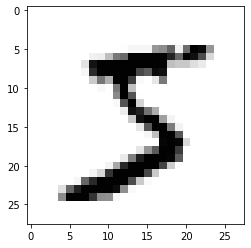

In [22]:

import matplotlib.pyplot as plt

factor = 0.99 / 255
train_imgs = np.asfarray(df_train.iloc[:, 1:]) * factor + 0.01

img = train_imgs[0].reshape((28,28))
plt.imshow(img, cmap="Greys")
plt.show()
    


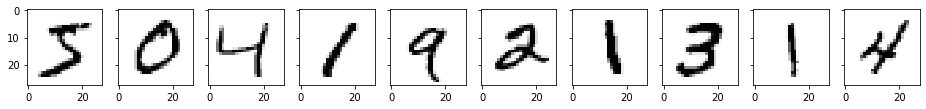

In [23]:
plt.rcParams["figure.figsize"] = [16,9]

fig, ax = plt.subplots(1, 10, sharex='col', sharey='row')

for i in range(1):
    for j in range(10):
        img = train_imgs[j].reshape((28,28))
        ax[j].imshow(img, cmap="Greys")
    

## WHAT IS SVD USED FOR?

<img src="img/svd1.png">
<img src="img/svd2.png">
<img src="img/svd3.png">


## SVD =  Singular value decomposition FOR TRAINING DATA


Number of Components:
 250

Explained Variance Ratio:
 [0.05650225 0.04080865 0.03752104 0.0288113  0.02533125 0.02194509
 0.0192199  0.01743556 0.01534336 0.01399884 0.01339884 0.01202738
 0.01113083 0.01089893 0.01027387 0.00993597 0.00935348 0.00919807
 0.00892626 0.00869298 0.00827172 0.00804865 0.00765432 0.00741035
 0.00716817 0.00691439 0.00683808 0.00655852 0.00632004 0.0061232
 0.0059556  0.00586909 0.00570904 0.00561524 0.00554371 0.00537691
 0.00530696 0.00519834 0.00508048 0.0047939  0.00475794 0.00468568
 0.00453716 0.00450821 0.00446584 0.00442769 0.00438458 0.0042998
 0.0042629  0.00423584 0.00404394 0.00398897 0.00396942 0.0039334
 0.00385315 0.0037852  0.00375505 0.00370269 0.00364599 0.00358836
 0.00351903 0.00347665 0.00343935 0.00339401 0.00335592 0.00334452
 0.00331414 0.0032258  0.00315838 0.00312908 0.00310303 0.00307264
 0.0030453  0.00302353 0.00299101 0.00297348 0.00294645 0.00290059
 0.00286875 0.00285338 0.00283053 0.00282935 0.00279238 0.0027915
 0.0027814

Text(0, 0.5, 'Fraction of Total Variance')

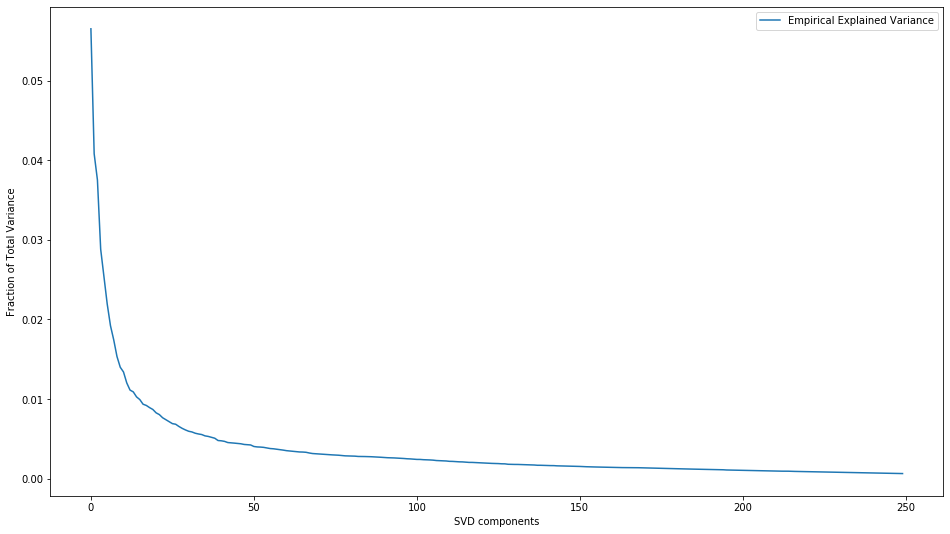

In [24]:
# SCALING TRAINING DATA BEFORE PERFORMING SVD

from sklearn.preprocessing import StandardScaler

# "X" WILL BE THE TRAINING DATA
x = StandardScaler().fit_transform(df_train)
X = pd.DataFrame(x) # Turning it back to a Pandas DataFrame


# USING SVD TO REDUCE THE NUMBER OF DIMENSIONS OF THE TRAINING DATA SET
# CHOOSING NUMBER OF COMPONENTS THAT EXPLAINS JUST ABOVE 90% OF THE TOTAL VARIANCE

from sklearn.decomposition import TruncatedSVD
n_components = 250
svd = TruncatedSVD(n_components = n_components).fit(X)


# CALCULATING TOTAL VARIANCE USING NUMPY
total_variance = np.var(X, axis=0).sum()

# REDUCING THE TRAINING DATA TO NUMBER OF COMPONENTS
X_transformed = svd.transform(X)

# CALCULATING THE NEW VARIANCE 
variances = np.var(X_transformed, axis=0)

# CALCULATING THE TRUE EXPLAINED VARIANCE RATIO = VARIANCES / TOTAL VARIANCE
true_explained_variance_ratio = variances / total_variance

# REPORTING HOW MANY COMPONENTS WERE SELECTED AND THEIR VARIANCE RATIOS (AND TOTAL SUM)
print("\nNumber of Components:\n", n_components)
print("\nExplained Variance Ratio:\n", true_explained_variance_ratio)
print("\nExplained Variance Ratio Sum:\n", svd.explained_variance_ratio_.sum())

percentage = svd.explained_variance_ratio_.sum() * 100
print(f"\nExplained Variance Ratio Sum (%):\n {percentage}% \n")

plt.plot(true_explained_variance_ratio, label='Empirical Explained Variance')
plt.legend(loc='best')
plt.xlabel('SVD components')
plt.ylabel('Fraction of Total Variance')

## SVD =  Singular value decomposition FOR TEST DATA

In [25]:
# SCALING TEST DATA BEFORE PERFORMING SVD

# "Y" WILL BE THE TEST DATA
y = StandardScaler().fit_transform(df_test)
Y = pd.DataFrame(y) # Turning it back to a Pandas DataFrame


# USING SVD TO REDUCE THE NUMBER OF DIMENSIONS OF THE TRAINING DATA SET
# CHOOSING NUMBER OF COMPONENTS THAT EXPLAINS JUST ABOVE 90% OF THE TOTAL VARIANCE

n_components = 250
svd = TruncatedSVD(n_components = n_components).fit(Y)

# CALCULATING TOTAL VARIANCE USING NUMPY
total_variance = np.var(Y, axis=0).sum()

# REDUCING THE TRAINING DATA TO NUMBER OF COMPONENTS
Y_transformed = svd.transform(Y)

# CALCULATING THE NEW VARIANCE 
variances = np.var(Y_transformed, axis=0)

# CALCULATING THE TRUE EXPLAINED VARIANCE RATIO = VARIANCES / TOTAL VARIANCE
true_explained_variance_ratio = variances / total_variance

# REPORTING HOW MANY COMPONENTS WERE SELECTED AND THEIR VARIANCE RATIOS (AND TOTAL SUM)
print("\nNumber of Components:\n", n_components)
print("\nExplained Variance Ratio:\n", true_explained_variance_ratio)
print("\nExplained Variance Ratio Sum:\n", svd.explained_variance_ratio_.sum())

percentage = svd.explained_variance_ratio_.sum() * 100
print(f"\nExplained Variance Ratio Sum (%):\n {percentage}% \n")



Number of Components:
 250

Explained Variance Ratio:
 [0.06199824 0.04261971 0.040419   0.03226216 0.02771465 0.02408527
 0.02044219 0.01880442 0.01670122 0.0151536  0.01470044 0.01310275
 0.01253967 0.01192863 0.01143425 0.01093475 0.0103149  0.00992744
 0.00945747 0.00910256 0.00888212 0.00865902 0.00846749 0.00824445
 0.00785421 0.00770881 0.00755794 0.00732569 0.00707869 0.00682453
 0.00667728 0.00653253 0.00646275 0.00621248 0.00603445 0.00591718
 0.00581225 0.0057239  0.00564827 0.00552115 0.00551055 0.0054726
 0.00533164 0.00519178 0.00512507 0.00498613 0.00497899 0.00488468
 0.00478158 0.00469199 0.00460718 0.00453805 0.0044523  0.00439603
 0.00433376 0.00423112 0.00418976 0.00413731 0.00411047 0.00405056
 0.00400188 0.00385957 0.00381246 0.00374876 0.0036596  0.00360553
 0.00356765 0.00349944 0.0034647  0.00343663 0.00335317 0.00333373
 0.00329719 0.00326568 0.00323652 0.00318442 0.00314181 0.00308954
 0.00307504 0.00301281 0.00297657 0.00290832 0.00287067 0.00284368
 0.0028

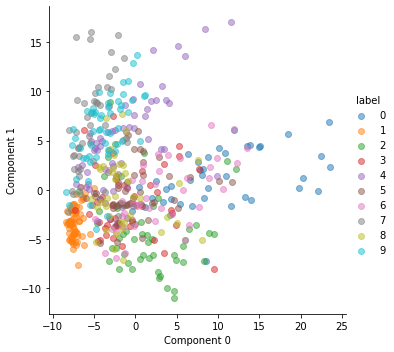

In [27]:
import seaborn as sns

# X is a matrix resulting from a dimensionality reduction method 
# Y is a list of labels for each instance
# c1 and c2 are column indices corresponding to the components that we wish to plot
# N is the number of instances

def scatterplot(X, Y, c1, c2, N):
    label_1 = f'Component {c1}'  # Label of x-axis
    label_2 = f'Component {c2}'  # label of y-axis  
    
    df = pd.DataFrame( {
                        label_1    : X[:N, c1], 
                        label_2    : X[:N, c2], 
                        'label'    : Y.iloc[:N,0] # Test Data Label df_test.iloc[:500,0]
                        })
    
    sns.lmplot(data=df, x=label_1, y=label_2, fit_reg=False, hue='label', scatter_kws={'alpha':0.5})  
    
scatterplot(Y_transformed, df_test, 0, 1, 500)